#### Import Libraries for Data Analysis

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Load both the Training Data Set

In [37]:
df_sales_train = pd.read_csv('Historical_train.csv')
df_sales_train.head()

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,52836,58868,Historical,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,73653,82447,Historical,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,30992,31672,Historical,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,64361,71808,Historical,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,8985,9256,Historical,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0


# 1. Data Preprocessing

## 1.1. Data Cleaning

#### 1.1.1. Remove the Unnecessary Columns
   Clearly there is an unnecessary column named  **`Unnamed: 0`** which needs to be removed.

In [38]:
# drop the column 'Unnamed: 0'
df_sales_train.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_sales_train

,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,58868,Historical,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,82447,Historical,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,31672,Historical,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,71808,Historical,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,9256,Historical,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53192,57924,Historical,3059530,S,0,0,607526,99.95,2003,22,253.92,99.76,0
53193,22917,Historical,57540,D,11,1,362378,30.60,2006,87,93.98,18.97,1
53194,12265,Historical,2471534,D,2,1,6046130,40.95,1996,16,0.00,32.48,0
53195,31440,Historical,567658,D,8,1,973353,105.95,2008,45,52.69,23.99,0


#### 1.1.2. Remove `null` values if any

In [39]:
df_sales_train.isnull().sum()

Order               0
File_Type           0
SKU_number          0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
SoldFlag            0
dtype: int64

<p>From the above output, it is clear that there are no null values in the data set.</p>

#### 1.1.3. Removing the Bad Predictors

We have 3 features( or columns) that are not needed for model building.

1. **`File_Type`**: Column with only one Category. So, not needed.
2. **`Order`**: A sequential number. Thus can be ignored.
3. **`SKU_Number`**: An unique identification number. Hence should be removed.

First, lets look at the data for these columns.


**`File_Type`**

In [40]:
df_sales_train.File_Type.value_counts()

Historical    53197
Name: File_Type, dtype: int64

<p>From the above output we can see that there is only one category `Historical` in the `File_Type' column. It is pretty evident that we don't need this column for building our model.</p>

**`SKU_number`**

In [41]:
df_sales_train.SKU_number.value_counts()

530429    1
545951    1
755396    1
206001    1
119983    1
         ..
608066    1
177980    1
875996    1
196405    1
526337    1
Name: SKU_number, Length: 53197, dtype: int64

*Column `SKU_number` clearly contains unique values.*

**`Order`**

In [42]:
df_sales_train.Order.value_counts()

2047     1
64266    1
2836     1
13075    1
15122    1
        ..
52787    1
50738    1
56881    1
54832    1
6147     1
Name: Order, Length: 53197, dtype: int64

*From the above output Column `Order` contains unique values.*

So these three features are not good predictors. So we can remove them.

In [43]:
df_sales_train.drop(['File_Type', 'SKU_number', 'Order'], axis = 1, inplace = True)
df_sales_train

,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,D,1,0,3760024,144.00,2004,13,43.94,33.99,0
...,...,...,...,...,...,...,...,...,...,...
53192,S,0,0,607526,99.95,2003,22,253.92,99.76,0
53193,D,11,1,362378,30.60,2006,87,93.98,18.97,1
53194,D,2,1,6046130,40.95,1996,16,0.00,32.48,0
53195,D,8,1,973353,105.95,2008,45,52.69,23.99,0


## 1.2 Data Type Conversion

### 1.2.1. Check the Data Types for each column

In [45]:
df_sales_train.dtypes

MarketingType        object
ReleaseNumber         int64
New_Release_Flag      int64
StrengthFactor        int64
PriceReg            float64
ReleaseYear           int64
ItemCount             int64
LowUserPrice        float64
LowNetPrice         float64
SoldFlag              int64
dtype: object

There seems to be one categorical variable `Marketing Type` with the type object. So let's look at the data for this column.

In [47]:
df_sales_train.MarketingType.value_counts()

S    28633
D    24564
Name: MarketingType, dtype: int64

### 1.2.2. Creating Dummy Feature for  `MarketType`

As the column `MarketType` contains two categories we need to convert this to numerical type. Pandas get_dummies() will come in handly as it creates the dummy features for each category in a particular column. We will use `drop_first = True` keyword argument so that it will drop the first category and leaves only one column. This keyword is just to ensure that we have as less features as possible with retaining the same information.

In [48]:
df_sales_train_dummies = pd.get_dummies(df_sales_train, drop_first=True)
df_sales_train_dummies

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,MarketingType_S
0,0,0,1255901,32.50,2004,26,27.57,10.99,0,1
1,0,0,208404,70.00,1988,21,15.99,40.02,1,1
2,9,1,50339,324.95,2013,53,149.73,123.94,0,0
3,4,1,1361255,39.95,2005,67,10.59,7.59,0,1
4,1,0,3760024,144.00,2004,13,43.94,33.99,0,0
...,...,...,...,...,...,...,...,...,...,...
53192,0,0,607526,99.95,2003,22,253.92,99.76,0,1
53193,11,1,362378,30.60,2006,87,93.98,18.97,1,0
53194,2,1,6046130,40.95,1996,16,0.00,32.48,0,0
53195,8,1,973353,105.95,2008,45,52.69,23.99,0,0


From the above output we can see that there is one column `MarketingType_S` added at the end.

Ideally, we should have got two features with the names *`MarketingType_S`* and *`MarketingType_D`*. Since we used *`drop_first = True`*, we will only get one feature.
> Whereever there is 0 in this column it means that it is `MarketingType` with value **`D`**. 

> Whereever there is 1 in this column it means that it is `MarketingType` with value **`S`**.


# 2. Data Analysis

In [57]:
print(df_sales_train_dummies.shape)
df_sales_train_dummies.head()

(53197, 10)


,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,MarketingType_S
0,0,0,1255901,32.50,2004,26,27.57,10.99,0,1
1,0,0,208404,70.00,1988,21,15.99,40.02,1,1
2,9,1,50339,324.95,2013,53,149.73,123.94,0,0
3,4,1,1361255,39.95,2005,67,10.59,7.59,0,1
4,1,0,3760024,144.00,2004,13,43.94,33.99,0,0


1. In Total we have 53197 rows and 10 dimenstions(or columns) in the dataset.
2. Target variable is `SoldFlag`

### 2.1. Distribution of the Features

First, lets check the distribution using the describe function.

#### 2.1.1. Describe using Pandas

In [58]:
df_sales_train_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
ReleaseNumber,53197.0,4.125797e+00,3.895184e+00,0.0,2.00,3.00,6.00,99.00
New_Release_Flag,53197.0,7.882399e-01,4.085595e-01,0.0,1.00,1.00,1.00,1.00
StrengthFactor,53197.0,1.216757e+06,1.524907e+06,68.0,243225.00,715500.00,1552432.00,16669658.00
PriceReg,53197.0,9.900403e+01,8.063133e+01,0.0,49.95,78.95,127.95,3986.31
ReleaseYear,53197.0,2.005971e+03,6.098045e+00,1945.0,2003.00,2007.00,2010.00,2016.00
ItemCount,53197.0,4.394165e+01,3.751590e+01,0.0,22.00,34.00,53.00,1426.00
LowUserPrice,53197.0,5.645554e+01,9.900629e+01,0.0,20.19,44.00,79.59,14140.21
LowNetPrice,53197.0,4.733542e+01,1.390497e+02,0.0,18.71,36.08,56.98,19138.79
SoldFlag,53197.0,1.710059e-01,3.765176e-01,0.0,0.00,0.00,0.00,1.00
MarketingType_S,53197.0,5.382446e-01,4.985399e-01,0.0,0.00,1.00,1.00,1.00


All most all the columns seemed to have the skewed distribution. For example, the **`ItemCount`** has the right-tailed distribution.
For ItemCount ...
1. `Mean`: 43.94
2. `Left-Tail`: (25% - min) = (34 - 22) = 12
3. `Right-Tail`: (max - 75%) = (1426 - 53) = 1373

`Right-Tail` is far greater than the `Left-Tail`. So the distribution for ItemCount is highly skewed to right.

We can chek like this for all variables. But PairPlot will be of assist us here.

### 2.1.2. Visualizing using seaborn's PairPlot

We use the seaborn's pairplot with ***`diag_kind = 'kde'`***. Because with Pairplot, at the diagnoal, it plots against the same variable. By default, it gives us a histogram. With 'kde' it gives us the nice smooth density curve through which we can visualize the distribution better. Pairplot offeres several advantages.

1. First, at the diagonal, it will tell us how the distribtion of a feature looks like.
2. Second, it gives a rough idea if there is any multicollinearity between the variables.
3. Third, it gives the relation with the target variable.

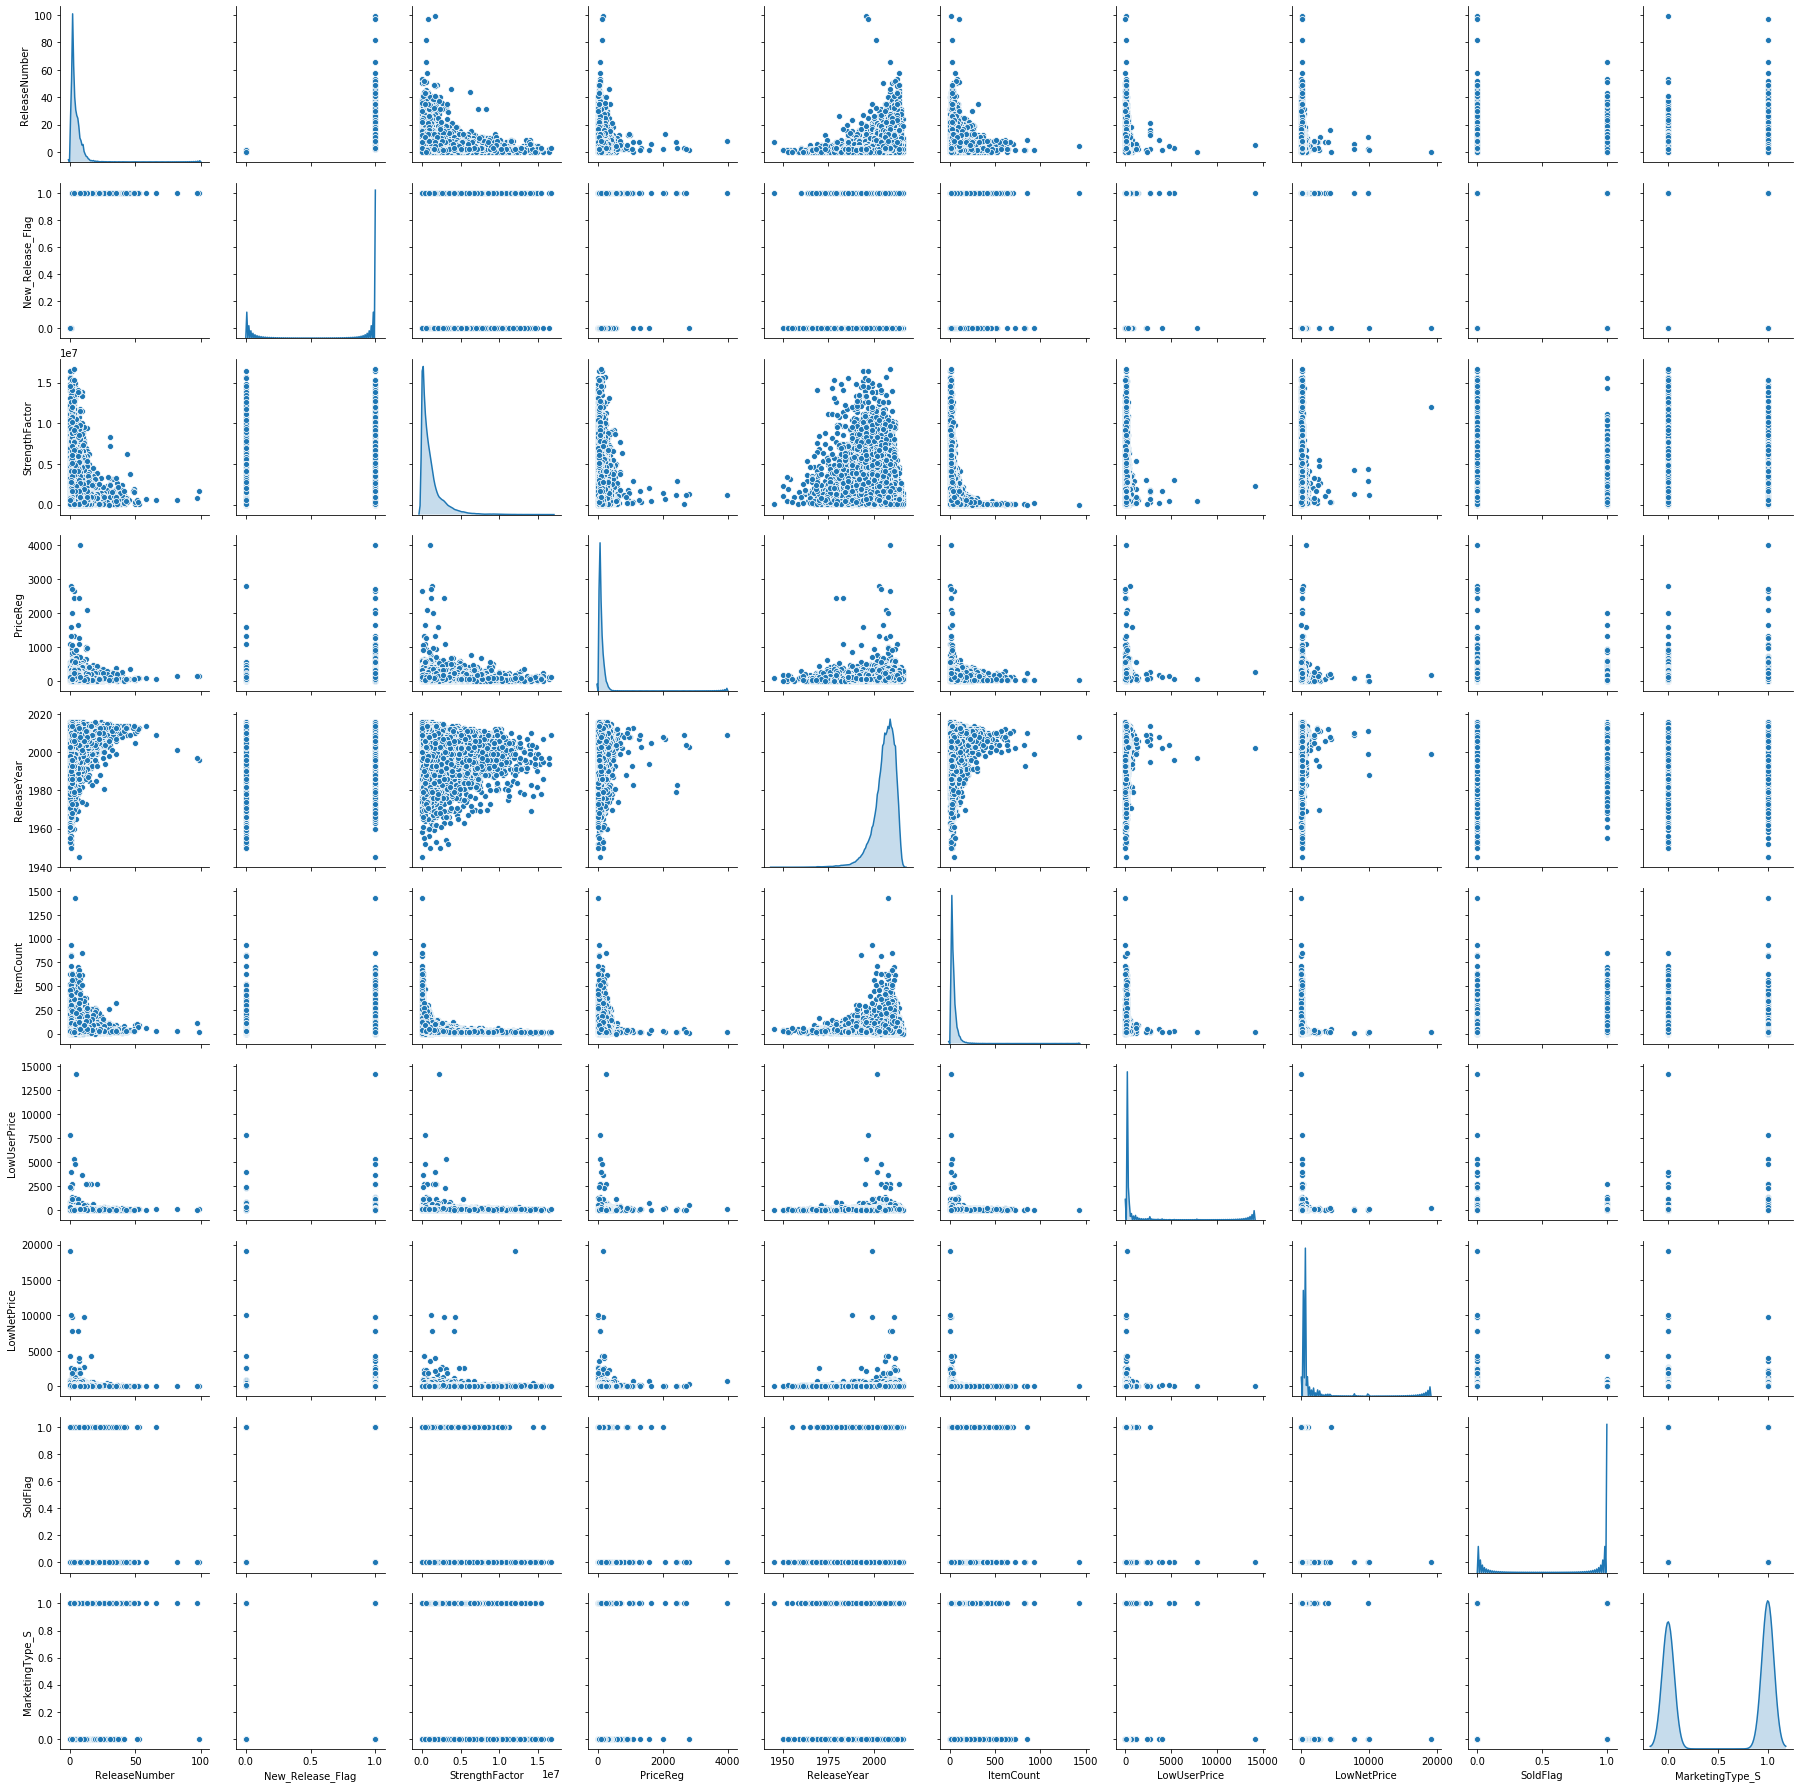

In [55]:
sns.pairplot(df_sales_train_dummies, diag_kind = 'kde')
plt.show()

### 2.1.3. Observations from the pairplot

1. Looking at the diagonal, all the variables have high skewness in their respective distributions.
2. There seems to be no collenearity b/w the independent variables.

### 2.1.3. Distributions based on the Target Variable's classfication

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


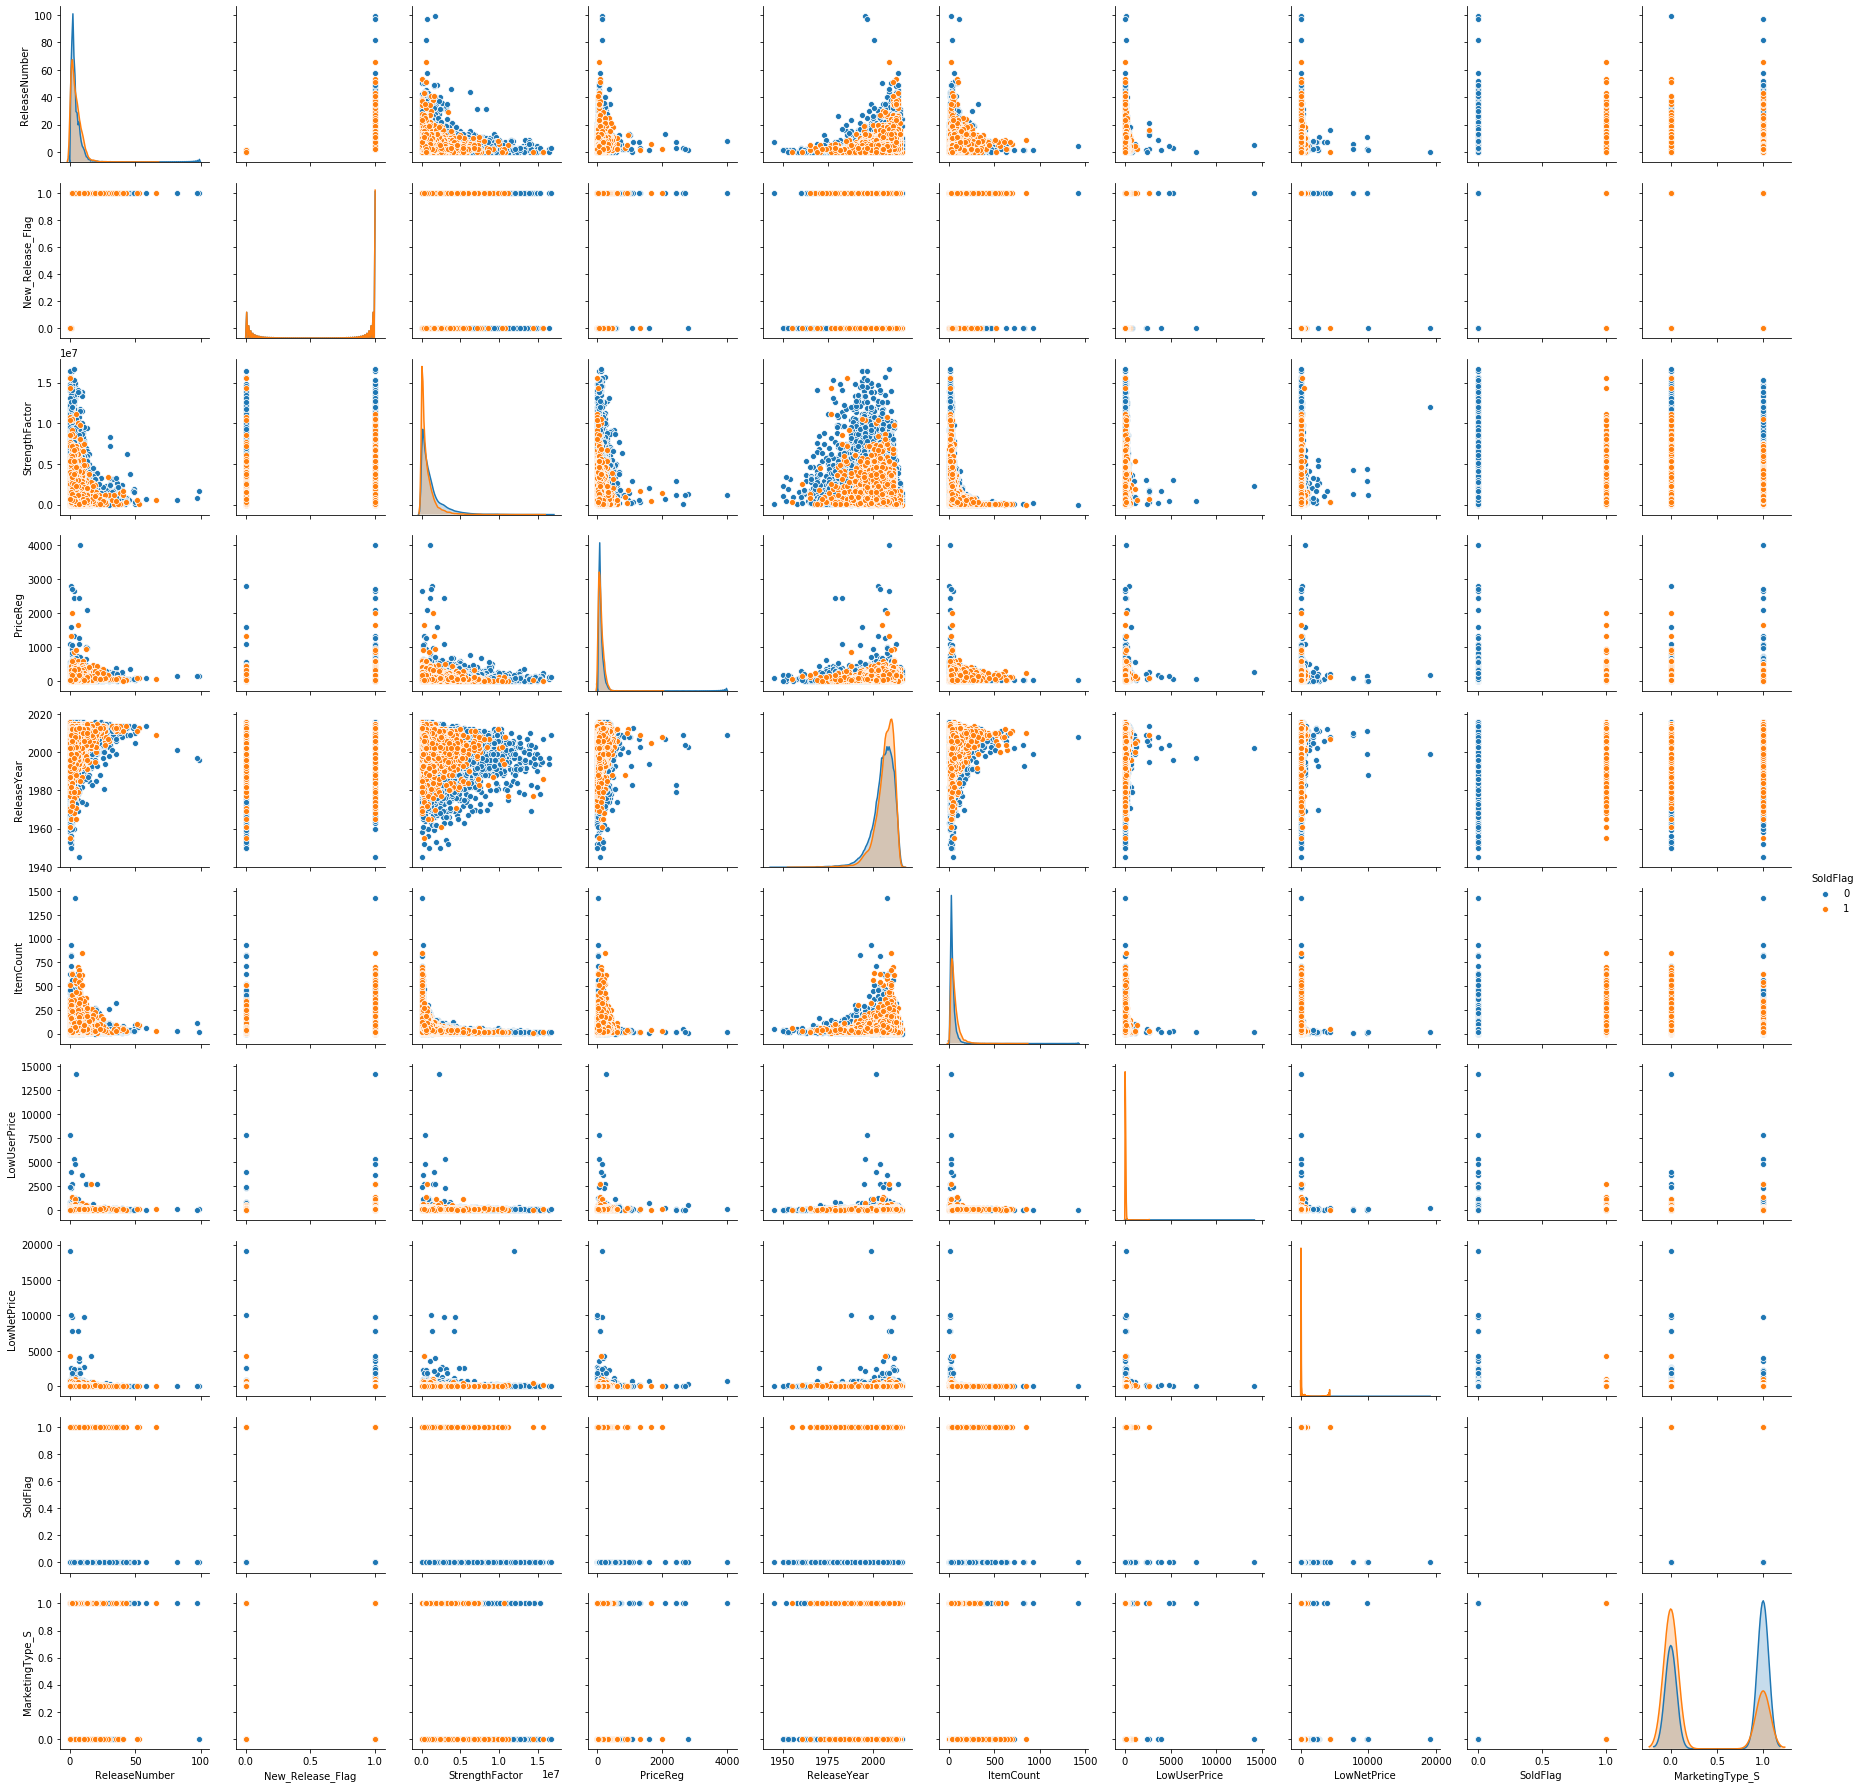

In [59]:
sns.pairplot(df_sales_train_dummies, hue = 'SoldFlag', diag_kind = 'kde')
plt.show()

From the above plot we can see that the features are evenly distributed between both the classes(class-0 and class-1) in the target variables.

### 2.1.4 Target Variable Class Distribution

It is important to check the target variable distribution. Because if the data in the Target Variable has skewed distribution the model may not fit well.

Since there are only two classes in the target variable, lets create a pie chart to visualize the percentage of each class.
We may need to upsample or downsample if we have skewed data for the target column.

0    44100
1     9097
Name: SoldFlag, dtype: int64


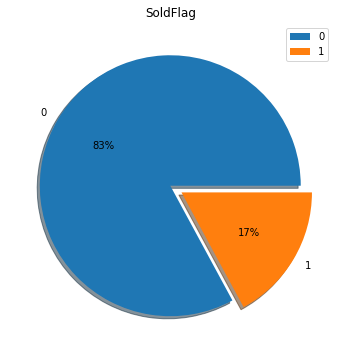

In [86]:
def draw_pie_chart(heights, explode, labels, title):
    plt.figure(figsize = (8, 6))
    plt.pie(heights, explode = explode,
            autopct = '%0.0f%%', shadow = True, labels = labels)
    plt.title("SoldFlag")
    # plt.axis('off')
    plt.legend()
    plt.show()

classes = df_sales_train_dummies.SoldFlag.value_counts()
print(classes)
labels = classes.index
explode = [0, 0.1]

draw_pie_chart(classes, explode, labels, "SoldFlag")


The two classes(class-0 and class-1) are clearly biased. We have 83% of the data is with the class-0 and 17% of the data is with Class-1. The ratio b/w class-0 and class-1 is huge.

### 2.1.5. Perform Upsampling of the dataset

As we learnt that the data for the target variable is biased. We need to do upsampling for the Class-1 so that the ratio becomes 50-50. So after upsampling we need to have 50-50 ratio of class-0 and class-1

In [116]:
df_sales_train_dummies.SoldFlag.value_counts() / len(df_sales_train_dummies)

0    0.828994
1    0.171006
Name: SoldFlag, dtype: float64

In [117]:
# Step-1: Split the data into two parts
# one SoldFlag= 0, and the other for SoldFlag = 1
data = df_sales_train_dummies
data_sold_flag_0 = data[data.SoldFlag == 0]
data_sold_flag_1 = data[data.SoldFlag == 1]
print("No of Rows with Sold Flag = 0:", len(data_sold_flag_0))
print("No of Rows with Sold Flag = 1:", len(data_sold_flag_1))

No of Rows with Sold Flag = 0: 44100
No of Rows with Sold Flag = 1: 9097


NOTE: We only need to resample the rows for SoldFlag = 1

In [153]:
# import library for resample
from sklearn.utils import resample
data_sold_flag_1_resampled = resample(data_sold_flag_1, replace = True, 
                                      n_samples = len(data_sold_flag_0),
                                      random_state = 17)
data_sold_flag_1_resampled

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,MarketingType_S
13037,5,1,288651,18.95,2009,114,46.56,18.86,1,0
2517,11,1,113177,188.00,2011,36,118.98,45.49,1,0
35411,4,1,631202,321.95,2006,58,119.28,41.49,1,0
49580,8,1,1272479,134.95,2008,31,72.04,41.16,1,0
21266,4,1,25141,144.50,2012,45,39.51,58.89,1,1
...,...,...,...,...,...,...,...,...,...,...
49161,6,1,521087,41.20,2002,175,63.99,13.78,1,0
18034,5,1,28835,87.99,2014,19,37.76,57.47,1,1
27752,3,1,616391,82.00,2006,37,23.99,5.75,1,1
39330,3,1,7623,84.95,2013,148,45.84,49.98,1,0


In [154]:
data_resampled = pd.concat([data_sold_flag_0, data_sold_flag_1_resampled], axis = 0)
data_resampled

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,MarketingType_S
0,0,0,1255901,32.50,2004,26,27.57,10.99,0,1
2,9,1,50339,324.95,2013,53,149.73,123.94,0,0
3,4,1,1361255,39.95,2005,67,10.59,7.59,0,1
4,1,0,3760024,144.00,2004,13,43.94,33.99,0,0
5,7,1,415071,257.75,2010,50,86.99,45.54,0,0
...,...,...,...,...,...,...,...,...,...,...
49161,6,1,521087,41.20,2002,175,63.99,13.78,1,0
18034,5,1,28835,87.99,2014,19,37.76,57.47,1,1
27752,3,1,616391,82.00,2006,37,23.99,5.75,1,1
39330,3,1,7623,84.95,2013,148,45.84,49.98,1,0


In [155]:
data_resampled.SoldFlag.value_counts() / len(data_resampled)

1    0.5
0    0.5
Name: SoldFlag, dtype: float64

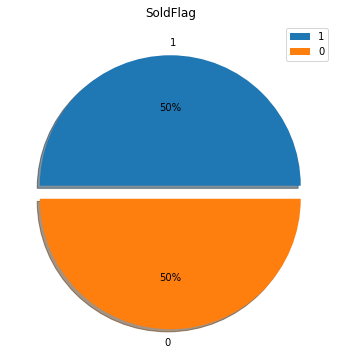

In [156]:
heights = data_resampled.SoldFlag.value_counts()
explode = [0, 0.1]
labels = heights.index
draw_pie_chart(heights, explode, labels, "SoldFlag Resampled")

So now we are good as we achieved close to 50:50 ratio for the target data. 

### 2.1.6. Correlation HeatMap b/w independent variables

In [157]:
corr = data_resampled.corr()
corr

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,MarketingType_S
ReleaseNumber,1.000000,0.484128,-0.124588,0.155510,0.245392,0.148945,0.117396,0.015951,0.105012,-0.040374
New_Release_Flag,0.484128,1.000000,-0.084741,0.109439,0.173549,0.093246,0.079217,0.005133,0.009309,0.093272
StrengthFactor,-0.124588,-0.084741,1.000000,-0.081276,-0.366087,-0.309745,0.016794,0.033700,-0.217059,-0.078408
PriceReg,0.155510,0.109439,-0.081276,1.000000,0.094905,0.087250,0.211671,0.094369,0.108990,-0.116824
ReleaseYear,0.245392,0.173549,-0.366087,0.094905,1.000000,0.137048,0.018995,0.010235,0.103353,0.050510
ItemCount,0.148945,0.093246,-0.309745,0.087250,0.137048,1.000000,0.061120,-0.080369,0.266340,-0.190272
LowUserPrice,0.117396,0.079217,0.016794,0.211671,0.018995,0.061120,1.000000,0.042032,0.093901,-0.177954
LowNetPrice,0.015951,0.005133,0.033700,0.094369,0.010235,-0.080369,0.042032,1.000000,-0.021489,0.013338
SoldFlag,0.105012,0.009309,-0.217059,0.108990,0.103353,0.266340,0.093901,-0.021489,1.000000,-0.294750
MarketingType_S,-0.040374,0.093272,-0.078408,-0.116824,0.050510,-0.190272,-0.177954,0.013338,-0.294750,1.000000


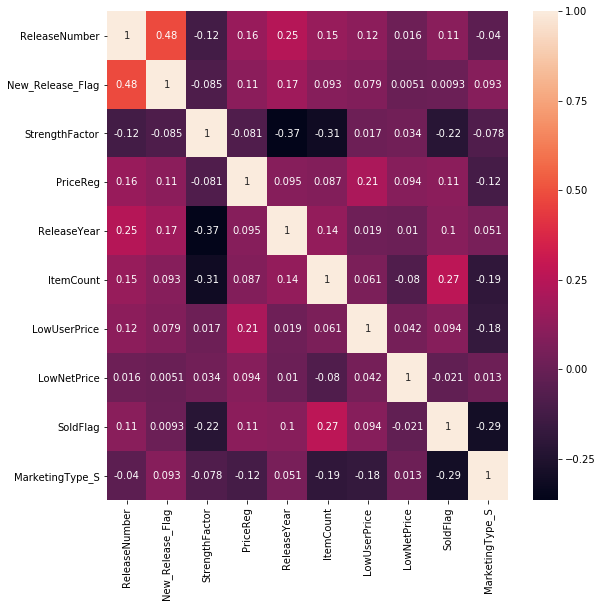

In [158]:
sns.heatmap(corr, annot = True)

No Correlation among independent variables.

## 3. Feature Engineering

### 3.1. Split the data into X and Y

In [159]:
X = data_resampled.drop(['SoldFlag'], axis = 1)
y = data_resampled.SoldFlag
X.head()

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,MarketingType_S
0,0,0,1255901,32.50,2004,26,27.57,10.99,1
2,9,1,50339,324.95,2013,53,149.73,123.94,0
3,4,1,1361255,39.95,2005,67,10.59,7.59,1
4,1,0,3760024,144.00,2004,13,43.94,33.99,0
5,7,1,415071,257.75,2010,50,86.99,45.54,0


In [160]:
y.shape

(88200,)

### 3.2.  Fitting The GLM - Generalized Linear Model

In [161]:
# Fit the generalized linear model
import statsmodels.api as sm
model = sm.GLM(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               SoldFlag   No. Observations:                88200
Model:                            GLM   Df Residuals:                    88191
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                         0.20738
Method:                          IRLS   Log-Likelihood:                -55769.
Date:                Sat, 29 Feb 2020   Deviance:                       18289.
Time:                        16:23:07   Pearson chi2:                 1.83e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ReleaseNumber        0.0065      0.000     14.729      0.000       0.006       0.007
New_Release_Flag    -0.0341      0.004     -7.819      0.000      -0.043      -0.026
StrengthFactor   -6.758e-08    1.2e-09    -56.187      0.000   -6.99e-08   -6.52e-08
PriceReg             0.0002   1.92e-05     12.165      0.000       0.000       0.000
ReleaseYear          0.0003   2.46e-06    114.915      0.000       0.000       0.000
ItemCount            0.0016   3.72e-05     43.987      0.000       0.002       0.002
LowUserPrice         0.0002   1.88e-05      8.886      0.000       0.000       0.000
LowNetPrice        -2.4e-05   1.35e-05     -1.781      0.075   -5.04e-05    2.41e-06
MarketingType_S     -0.2688      0.003    -82.215      0.000      -0.275      -0.262
====================================================================================
"""

In [162]:
model.pvalues.map(lambda x: round(x, 2)).sort_values(ascending = False)

LowNetPrice         0.07
MarketingType_S     0.00
LowUserPrice        0.00
ItemCount           0.00
ReleaseYear         0.00
PriceReg            0.00
StrengthFactor      0.00
New_Release_Flag    0.00
ReleaseNumber       0.00
dtype: float64

We can see that all the features seemed to be good for fitting the model. The `LowNetPrice` is having the value greater than 0.05. Ideally, we should not have the features with P-Values greater than 0.05. But for now, lets keep it as it is. In our feature engineering we are not deleting any features. So far we have pretty good features.

# 4. Build The Model With Logistic Regression

In [166]:
import warnings
warnings.filterwarnings('ignore')

### 4.1. Spliting Train and Test Data

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70560, 9), (17640, 9), (70560,), (17640,))

### 4.2. Fit the Model on Train

In [180]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

y_test_predicted = model.predict(x_test)
cr = classification_report(y_test, y_test_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.45      0.53      8858
           1       0.57      0.73      0.64      8782

    accuracy                           0.59     17640
   macro avg       0.60      0.59      0.58     17640
weighted avg       0.60      0.59      0.58     17640



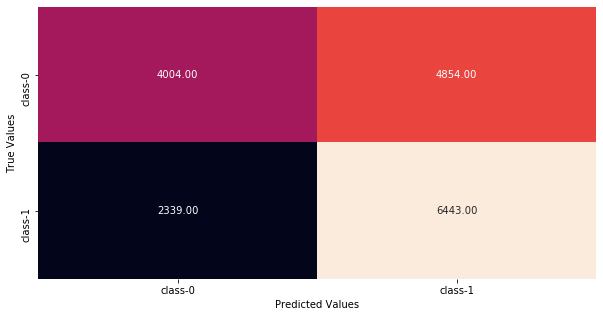

In [199]:
cm = confusion_matrix(y_test, y_test_predicted)
plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot = True, fmt = '0.2f', 
            xticklabels=['class-0','class-1'],
            yticklabels = ['class-0','class-1'],
            cbar = False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [200]:
print("Logistic Regression - Precision: ", precision_score(y_test, y_test_predicted))
print("Logistic Regression - Recall: ", recall_score(y_test, y_test_predicted))
print("Logistic Regression - Accuracy: ", accuracy_score(y_test, y_test_predicted))

Logistic Regression - Precision:  0.5703284057714437
Logistic Regression - Recall:  0.7336597585971305
Logistic Regression - Accuracy:  0.5922335600907029


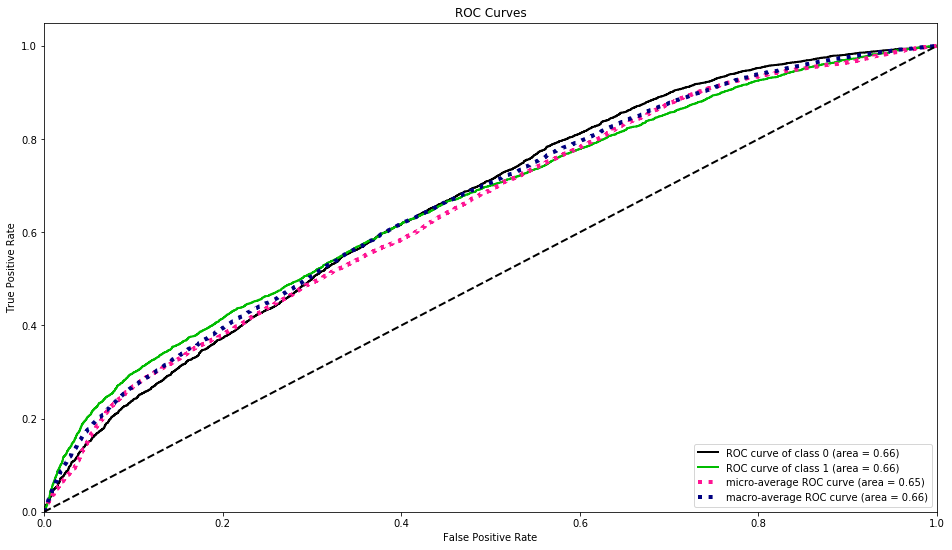

In [202]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, model.predict_proba(x_test), figsize = (16,9))
plt.show()

LogisticRegression is not giving very good results. Lets try other models.

## 5. Building the Model with DecisionTreeClassifier

In [212]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Classification tree
from sklearn.tree import export_graphviz # Visualising Tree

model_tune = DecisionTreeClassifier()
tuned_parameter = [{'criterion' : ['gini', 'entropy'], 'max_depth':range(2,10)}] # hyper parameters
clf = GridSearchCV(model_tune, param_grid=tuned_parameter, cv = 10, scoring='roc_auc')
clf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [213]:
print("Best Score:", clf.best_score_)
print("Best Tuning Parameters:", clf.best_params_)

Best Score: 0.7863966414996625
Best Tuning Parameters: {'criterion': 'gini', 'max_depth': 9}


In [214]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
print(scores)

[0.71956922 0.71205895 0.71215986 0.70252268 0.72604875 0.71825397
 0.71471088 0.71641156 0.71722183 0.72034018]


The cross_val_score for every cross sample varies very less around 71. Lets try this model with the test data.

### 5.2. Running the Model on Test Data 

In [221]:
df_sales_test = pd.read_csv('Historical_test_without_target.csv')
df_sales_test.shape
df_sales_test.drop(['Unnamed: 0', 'File_Type', 'SKU_number', 'Order'], axis = 1, inplace = True)
df_sales_test = pd.get_dummies(df_sales_test, drop_first = True)
df_sales_test

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,MarketingType_S
0,2,1,1349864,122.20,2003,25,16.24,10.94,1
1,6,1,410348,56.00,2003,51,127.72,29.94,0
2,1,0,92099,84.95,2011,20,0.00,0.00,1
3,5,1,801001,185.95,2004,21,4.33,86.83,1
4,2,1,1051302,65.00,2006,60,26.80,28.99,0
...,...,...,...,...,...,...,...,...,...
22794,18,1,18044,107.00,2013,44,41.99,58.52,1
22795,10,1,9876,254.95,2013,113,120.17,79.27,0
22796,1,0,778672,55.00,1995,59,0.00,32.24,1
22797,4,1,4947423,10.51,2008,47,129.31,11.53,1


In [227]:
predicted = clf.predict(df_sales_test)
pd.DataFrame(predicted).to_csv('predicted.csv')

## 6. Building the Model with RandomForestRegressor

### 6.1. Building a pipeline for RandomForestRegressor

In [228]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

# Declare data Preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))
pipeline

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [229]:
# Hyper Parameters
hyperparameters= { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'], 
                  'randomforestregressor__max_depth' : [None, 5, 3, 1]}
hyperparameters

{'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
 'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [230]:
# Tune Model Using Cross-Validation Pipeline
clf_rfr = GridSearchCV(pipeline, hyperparameters, cv=5)
clf_rfr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=

In [231]:
print("Best Score Using RandomForestRegressor:", clf_rfr.best_score_)
print("Best Tuning Parameters using RandomForestRegressor:", clf_rfr.best_params_)

Best Score Using RandomForestRegressor: 0.76305119024855
Best Tuning Parameters using RandomForestRegressor: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2'}


In [235]:
predicted_rfr = clf_rfr.predict(df_sales_test)
predicted_rfr
# pd.DataFrame(predicted_rfr).to_csv('predicted_rfr.csv')

array([0.07, 0.55, 0.28, ..., 0.07, 0.13, 0.44])